<a href="https://colab.research.google.com/github/ashtonsouthwick/DSPS_ASouthwick/blob/main/HW3/earthquake_data_munging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

In [3]:
earthquakes = pd.read_csv('https://raw.githubusercontent.com/fedhere/DSPS_FBianco/refs/heads/main/data/earthquakes.csv',
            sep=r'\s+' )

In [4]:
earthquakes.shape

(70798, 13)

In [5]:
earthquakes.head(3)

,#YYY/MM/DD,HH:mm:SS.ss,ET,GT,MAG,M,LAT,LON,DEPTH,Q,EVID,NPH,NGRM
0,1984/01/01,01:30:57.52,eq,l,2.02,c,33.246,-116.433,1.6,C,28255,13,17
1,1984/01/01,05:31:34.16,eq,l,2.12,c,32.945,-116.295,5.4,C,28259,18,42
2,1984/01/01,06:59:05.14,eq,l,2.43,c,33.343,-117.628,5.6,C,28260,13,30


In [6]:
earthquakes.tail(3)

,#YYY/MM/DD,HH:mm:SS.ss,ET,GT,MAG,M,LAT,LON,DEPTH,Q,EVID,NPH,NGRM
70795,2002/12/29,20:21:28.73,eq,l,2.07,l,35.32150,-118.66617,1.9,A,9874749,53,277
70796,2002/12/30,21:51:52.55,eq,l,2.31,l,35.31867,-118.66250,1.5,A,9875017,66,404
70797,2002/12/30,23:38:49.79,eq,l,2.05,l,35.31450,-118.66333,1.9,A,9875061,54,283


In [7]:
earthquakes.columns

Index(['#YYY/MM/DD', 'HH:mm:SS.ss', 'ET', 'GT', 'MAG', 'M', 'LAT', 'LON',
       'DEPTH', 'Q', 'EVID', 'NPH', 'NGRM'],
      dtype='object')

In [8]:
earthquakes = earthquakes[['#YYY/MM/DD', 'HH:mm:SS.ss', 'MAG']]

In [9]:
earthquakes.dtypes

,0
#YYY/MM/DD,object
HH:mm:SS.ss,object
MAG,float64


In [10]:
earthquakes.rename({"#YYY/MM/DD": "date", "HH:mm:SS.ss": "time", "MAG": "mag"}, axis=1, inplace=True) #axis=1 indicates renaming by column

In [11]:
earthquakes

,date,time,mag
0,1984/01/01,01:30:57.52,2.02
1,1984/01/01,05:31:34.16,2.12
2,1984/01/01,06:59:05.14,2.43
3,1984/01/01,11:10:25.29,2.07
4,1984/01/01,19:38:19.79,2.13
...,...,...,...
70793,2002/12/29,19:37:24.56,2.21
70794,2002/12/29,20:17:33.40,2.02
70795,2002/12/29,20:21:28.73,2.07
70796,2002/12/30,21:51:52.55,2.31


In [12]:
earthquakes.describe()

,mag
count,70798.000000
mean,2.417826
std,0.407683
min,2.000000
25%,2.120000
50%,2.300000
75%,2.590000
max,7.100000


In [13]:
earthquakes['newdate'] = earthquakes['date'].map(pd.to_datetime)

In [14]:
earthquakes['datetime'] = earthquakes['date'] + " " + earthquakes['time']
earthquakes['datetime']

,datetime
0,1984/01/01 01:30:57.52
1,1984/01/01 05:31:34.16
2,1984/01/01 06:59:05.14
3,1984/01/01 11:10:25.29
4,1984/01/01 19:38:19.79
...,...
70793,2002/12/29 19:37:24.56
70794,2002/12/29 20:17:33.40
70795,2002/12/29 20:21:28.73
70796,2002/12/30 21:51:52.55


In [15]:
# earthquakes['newdatetime'] = earthquakes['datetime'].map(pd.to_datetime)

In [16]:
for i in earthquakes.index:
  if earthquakes.loc[i, "time"].endswith('60.00'):
    print(earthquakes.loc[i,'time'])
    earthquakes.loc[i, 'time'] = earthquakes.loc[i, 'time'][:6] + "59.99"
    print(earthquakes.loc[i, 'time'])


04:48:60.00
04:48:59.99
14:19:60.00
14:19:59.99
21:48:60.00
21:48:59.99
15:34:60.00
15:34:59.99
06:41:60.00
06:41:59.99


In [17]:
earthquakes['datetime'] = earthquakes['date'] + ' ' + earthquakes['time']
earthquakes['newdatetime'] = earthquakes['datetime'].map(pd.to_datetime)
earthquakes['newdatetime']

,newdatetime
0,1984-01-01 01:30:57.520
1,1984-01-01 05:31:34.160
2,1984-01-01 06:59:05.140
3,1984-01-01 11:10:25.290
4,1984-01-01 19:38:19.790
...,...
70793,2002-12-29 19:37:24.560
70794,2002-12-29 20:17:33.400
70795,2002-12-29 20:21:28.730
70796,2002-12-30 21:51:52.550


In [18]:
earthquakes.describe()

,mag,newdate,newdatetime
count,70798.000000,70798,70798
mean,2.417826,1992-11-07 16:14:28.092318976,1992-11-08 04:14:59.083973376
min,2.000000,1984-01-01 00:00:00,1984-01-01 01:30:57.520000
25%,2.120000,1988-05-05 00:00:00,1988-05-05 20:49:20.964999936
50%,2.300000,1992-07-18 00:00:00,1992-07-18 06:27:56.530000
75%,2.590000,1996-10-29 00:00:00,1996-10-29 15:31:47.564999936
max,7.100000,2002-12-30 00:00:00,2002-12-30 23:38:49.790000
std,0.407683,NaN,NaN


In [19]:
earthquakes['newdatetime'].mean()

Timestamp('1992-11-08 04:14:59.083973376')

In [20]:
earthquakes['newdatetime'].std()

Timedelta('1826 days 19:14:43.046994976')

In [21]:
earthquakes['newdatetime'].diff() # check if ordered chronologically

,newdatetime
0,NaT
1,0 days 04:00:36.640000
2,0 days 01:27:30.980000
3,0 days 04:11:20.150000
4,0 days 08:27:54.500000
...,...
70793,0 days 00:00:30.140000
70794,0 days 00:40:08.840000
70795,0 days 00:03:55.330000
70796,1 days 01:30:23.820000


# The above was from class, below is homework

Starting here is stuff we did not do together in class but is part of the homework due on 9/17

Following the description in Section 2 of Corral 2018 I removed all data that did not belong to a "stationary" period. Third paragraph section 2 of Corral 2018. You can see the cell of code I used to do this here at no points cost, cause it was a bit tricky, but I encourage you to try and do it yourself. If you can do it in fewer lines than I did its automatically +5 points (just turning the loop into a list comprehension does not count. That is an obvious way to decrease the number of lines of code; I did not do it simply to enhance readability.)

In [22]:
# #this are snippits of code. This is not intended as a script that should run on its own.

# # first I create the timetamps pairs for the beginning and end of the valid periods.
# # I do it with a for loop that appends pairs of timestamps to a list that I create at the beginning

# ############
# # create empty container
# ss = []

# # loop through all year pairs as year and fraction of year
# for t in [(1984, 1986.5),
#           (1990.3, 1992.1),
#           (1994.6, 1995.6),
#           (1996.1,1996.5),
#           (1997,1997.6),
#           (1997.75,1998.15),
#           (1998.25,1999.35),
#           (2000.55,2000.8),
#           (2000.9 ,2001.25),
#           (2001.6 ,2002),
#           (2002.5 ,2003)]:

#     # for each pair I convert the year to datetime (easy)
#     # then I convert the fraction of year and convert it to days and convert that to a delta-time
#     # finally I add that deltatime to the year datetime.
#     ss.append((pd.to_datetime(int(t[0]), format="%Y")
#         + pd.Timedelta('%.f days'%((t[0] - int(t[0])) * 365.25)),
#                pd.to_datetime(int(t[1]), format="%Y")
#         + pd.Timedelta('%.f days'%((t[1] - int(t[1])) * 365.25))))


# ############

# print ("the {} timestamp pairs that are the boundaries of good data periods are:".format(len(ss)))


# ############

# # data between start and end of first time period
# gooddates = (((earthquakes.newdatetime >= ss[0][0]) * (earthquakes.newdatetime <= ss[0][1])) +\
#         # data between start and end of second time period
#         ((earthquakes.newdatetime >=ss [1][0]) * (earthquakes.newdatetime <= ss[1][1])) +\
#         ((earthquakes.newdatetime >=ss [2][0]) * (earthquakes.newdatetime <= ss[2][1])) +\
#         ((earthquakes.newdatetime >=ss [3][0]) * (earthquakes.newdatetime <= ss[3][1])) +\
#         ((earthquakes.newdatetime >=ss [4][0]) * (earthquakes.newdatetime <= ss[4][1])) +\
#         ((earthquakes.newdatetime >=ss [5][0]) * (earthquakes.newdatetime <= ss[5][1])) +\
#         ((earthquakes.newdatetime >=ss [6][0]) * (earthquakes.newdatetime <= ss[6][1])) +\
#         ((earthquakes.newdatetime >=ss [7][0]) * (earthquakes.newdatetime <= ss[7][1])) +\
#         ((earthquakes.newdatetime >=ss [8][0]) * (earthquakes.newdatetime <= ss[8][1])) +\
#         ((earthquakes.newdatetime >=ss [9][0]) * (earthquakes.newdatetime <= ss[9][1])) +\
#         # data between start and end of last time period
#         ((earthquakes.newdatetime >=ss [10][0]) * (earthquakes.newdatetime <= ss[10][1])\
#         ).values)
# gooddates

In [23]:
# your code here
ss = []

# loop through all year pairs as year and fraction of year
for t in [(1984, 1986.5),
          (1990.3, 1992.1),
          (1994.6, 1995.6),
          (1996.1,1996.5),
          (1997,1997.6),
          (1997.75,1998.15),
          (1998.25,1999.35),
          (2000.55,2000.8),
          (2000.9 ,2001.25),
          (2001.6 ,2002),
          (2002.5 ,2003)]:
    # for each pair I convert the year to datetime (easy)
    # then I convert the fraction of year and convert it to days and convert that to a delta-time
    # finally I add that deltatime to the year datetime.
    ss.append((pd.to_datetime(int(t[0]), format="%Y")
               + pd.Timedelta(days=(t[0] - int(t[0])) * 365.25),
               pd.to_datetime(int(t[1]), format="%Y")
               + pd.Timedelta(days=(t[1] - int(t[1])) * 365.25)))

print ("the {} timestamp pairs that are the boundaries of good data periods are:".format(len(ss)))
# data between start and end of first time period
gooddates = pd.Series(
    np.any(
        [(earthquakes.newdatetime >= start) & (earthquakes.newdatetime <= end) for start, end in ss],
        axis=0
    ),
    index=earthquakes.index,
    name="newdatetime"
)
gooddates

the 11 timestamp pairs that are the boundaries of good data periods are:


,newdatetime
0,True
1,True
2,True
3,True
4,True
...,...
70793,True
70794,True
70795,True
70796,True


In [24]:
ss

[(Timestamp('1984-01-01 00:00:00'), Timestamp('1986-07-02 15:00:00')),
 (Timestamp('1990-04-20 13:47:59.999998566'),
  Timestamp('1992-02-06 12:35:59.999997129')),
 (Timestamp('1994-08-08 03:35:59.999997132'),
  Timestamp('1995-08-08 03:35:59.999997132')),
 (Timestamp('1996-02-06 12:35:59.999997129'),
  Timestamp('1996-07-01 15:00:00')),
 (Timestamp('1997-01-01 00:00:00'),
  Timestamp('1997-08-08 03:35:59.999997132')),
 (Timestamp('1997-10-01 22:30:00'),
  Timestamp('1998-02-24 18:54:00.000002870')),
 (Timestamp('1998-04-02 07:30:00'),
  Timestamp('1999-05-08 20:05:59.999997130')),
 (Timestamp('2000-07-19 21:17:59.999998562'),
  Timestamp('2000-10-19 04:47:59.999998564')),
 (Timestamp('2000-11-24 17:24:00.000002868'),
  Timestamp('2001-04-02 07:30:00')),
 (Timestamp('2001-08-08 03:35:59.999997132'),
  Timestamp('2002-01-01 00:00:00')),
 (Timestamp('2002-07-02 15:00:00'), Timestamp('2003-01-01 00:00:00'))]

The following cell of code shows you the array of bool values (True/False) which I create to use as an index to the input array: when used as an index, a technique called "broadcasting" in python, will select only elements of the original array where the index array value is True. something like Try:

In [25]:
a = np.array([0, 1, 2])
a, a[[True, False, True]]

(array([0, 1, 2]), array([0, 2]))

For each of the 11 valid periods I create a condition datetime >= period_start AND datetime <= period_end where AND is a product of booleans: True * False = False.

I want to take all chinks of data that satisfy this condition for any of the 11 chunks of time so that is a logical OR operator, or a sum of Booleans: True + False = True

This is because True really corresponds to "not 0" and False to "0". So "not 0" * 0 = 0 and "not 0" + 0 = not 0

In [26]:
# your code here
# start with all False
gooddates = np.zeros(len(earthquakes), dtype=bool)

# loop through each stationary interval and OR them together
for start, end in ss:
    gooddates = gooddates + ((earthquakes.newdatetime >= start) * (earthquakes.newdatetime <= end))

print ("there are {} earthquakes falling in the selected stationary periods".
       format(gooddates.sum()))

there are 18854 earthquakes falling in the selected stationary periods


In [27]:
# your code here: broadcasting to create a dataframe with the good dates only
eqGoodData = earthquakes[gooddates]
eqGoodData.shape

(18854, 6)

In [28]:
eqGoodData.head()

,date,time,mag,newdate,datetime,newdatetime
0,1984/01/01,01:30:57.52,2.02,1984-01-01,1984/01/01 01:30:57.52,1984-01-01 01:30:57.520
1,1984/01/01,05:31:34.16,2.12,1984-01-01,1984/01/01 05:31:34.16,1984-01-01 05:31:34.160
2,1984/01/01,06:59:05.14,2.43,1984-01-01,1984/01/01 06:59:05.14,1984-01-01 06:59:05.140
3,1984/01/01,11:10:25.29,2.07,1984-01-01,1984/01/01 11:10:25.29,1984-01-01 11:10:25.290
4,1984/01/01,19:38:19.79,2.13,1984-01-01,1984/01/01 19:38:19.79,1984-01-01 19:38:19.790


Now what you really want is the time interval between earthquakes for all events greater than some magnitude m, while all you have are the date and time of the events

You can remove earthquakes smaller than magnitude 2 by, again, broadcasting. How would that look like?

In [29]:
# your code here
M = 2
eqGoodData = eqGoodData[eqGoodData['mag'] > M]
eqGoodData.shape #look like for my data it was not needed! that is because I chose M>2 when when I downloaded the data

(18029, 6)

You can get the time between consecutive earthquakes with the method diff() of

1.   List item

1.   List item
2.   List item


2.   List item

numpy arrays (as done in class).

In [30]:
#your code here
eqGoodData['diff'] = eqGoodData['newdatetime'].diff()
eqGoodData.shape

(18029, 7)

In [31]:
# checking if all dates are in chronological order (sanity check for me)
dt = eqGoodData['newdatetime'].diff()

# check if any differences are negative
any_negative = (dt < pd.Timedelta(0)).any()
print("Any non-chronological entries?", any_negative) # returns false if data in chronological order

Any non-chronological entries? False


In [32]:
eqGoodData.head()

,date,time,mag,newdate,datetime,newdatetime,diff
0,1984/01/01,01:30:57.52,2.02,1984-01-01,1984/01/01 01:30:57.52,1984-01-01 01:30:57.520,NaT
1,1984/01/01,05:31:34.16,2.12,1984-01-01,1984/01/01 05:31:34.16,1984-01-01 05:31:34.160,0 days 04:00:36.640000
2,1984/01/01,06:59:05.14,2.43,1984-01-01,1984/01/01 06:59:05.14,1984-01-01 06:59:05.140,0 days 01:27:30.980000
3,1984/01/01,11:10:25.29,2.07,1984-01-01,1984/01/01 11:10:25.29,1984-01-01 11:10:25.290,0 days 04:11:20.150000
4,1984/01/01,19:38:19.79,2.13,1984-01-01,1984/01/01 19:38:19.79,1984-01-01 19:38:19.790,0 days 08:27:54.500000


In [33]:
eqGoodData.describe()

,mag,newdate,newdatetime,diff
count,18029.000000,18029,18029,18028
mean,2.417662,1992-11-20 23:48:53.873204352,1992-11-21 11:42:52.313160320,0 days 09:14:15.096087752
min,2.010000,1984-01-01 00:00:00,1984-01-01 01:30:57.520000,0 days 00:00:00.170000
25%,2.130000,1985-10-16 00:00:00,1985-10-16 09:01:55.610000,0 days 00:47:30.935000
50%,2.300000,1994-09-02 00:00:00,1994-09-02 17:00:34.020000,0 days 02:35:36.370000
75%,2.580000,1998-05-05 00:00:00,1998-05-05 16:27:33.650000,0 days 06:13:05.592500
max,5.800000,2002-12-30 00:00:00,2002-12-30 23:38:49.790000,1388 days 07:40:00.240000
std,0.391676,NaN,NaN,13 days 01:38:50.853970120


Note that the first entry will be NaT which is Not a Time (corresponding to nan for numerical variables) or maybe a negative number (depends on your exact operations above). You should remove it

In [34]:
# your code here
eqGoodData = eqGoodData.dropna(subset=['diff']).reset_index(drop=True)
eqGoodData.head()

,date,time,mag,newdate,datetime,newdatetime,diff
0,1984/01/01,05:31:34.16,2.12,1984-01-01,1984/01/01 05:31:34.16,1984-01-01 05:31:34.160,0 days 04:00:36.640000
1,1984/01/01,06:59:05.14,2.43,1984-01-01,1984/01/01 06:59:05.14,1984-01-01 06:59:05.140,0 days 01:27:30.980000
2,1984/01/01,11:10:25.29,2.07,1984-01-01,1984/01/01 11:10:25.29,1984-01-01 11:10:25.290,0 days 04:11:20.150000
3,1984/01/01,19:38:19.79,2.13,1984-01-01,1984/01/01 19:38:19.79,1984-01-01 19:38:19.790,0 days 08:27:54.500000
4,1984/01/01,19:39:19.67,2.13,1984-01-01,1984/01/01 19:39:19.67,1984-01-01 19:39:19.670,0 days 00:00:59.880000


#data exploration
At this point you should wonder if this is the final dataset that you want to use and if anything is weird or suspicious about it. Visualize the distribution. A good way to visualize distributions is a histogram which you can prodice with pl.hist() or as a method of your dataframe series as df[SeriesName].plot(kind="hist"). Produce a plot like the one below (label the axis! and describe it with a caption!). To get the logarithmic y axis you can se logy=True, for example. in your df[SeriesName].plot call.

The thing that worries me is that by removing some sections of the data to use only stationary periods we created some artificially large gaps: gaps of order ~month. How many nanoseconds in a month? remove all gaps that are larger than about a month and see how the distribution looks (make another histogram).

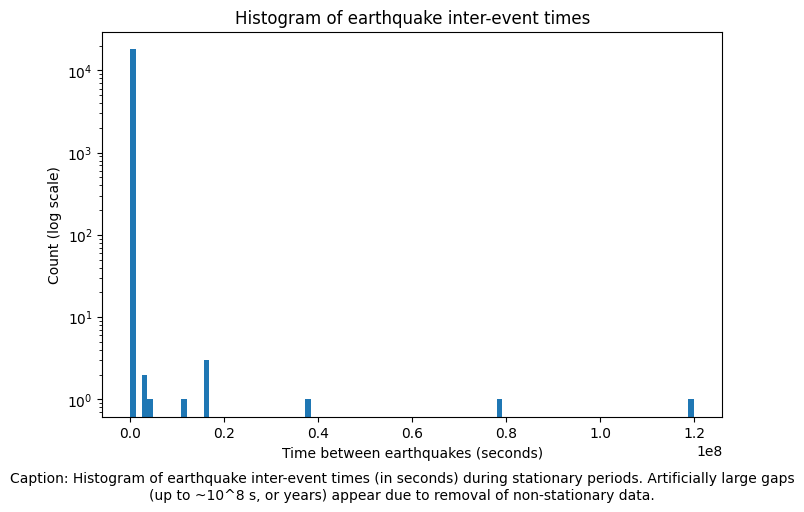

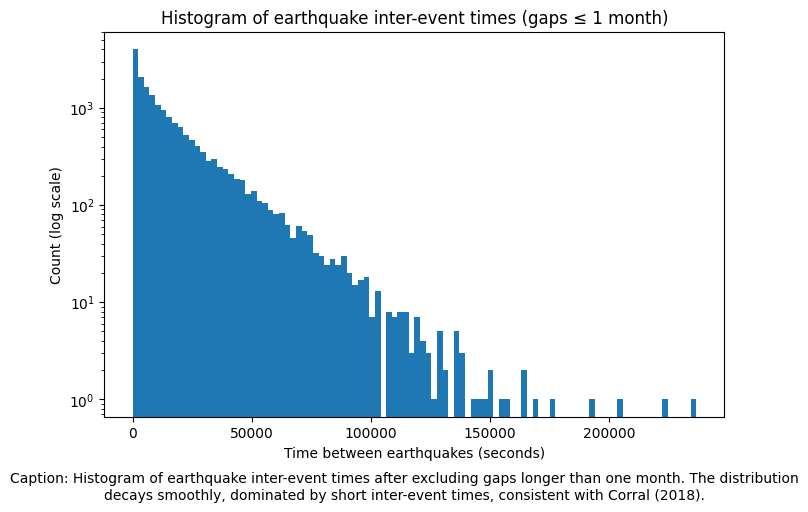

In [41]:
# your code here
import matplotlib.pyplot as plt

#converting to seconds
eqGoodData['dt_seconds'] = eqGoodData['diff'].dt.total_seconds()

# Histogram of all time
eqGoodData['dt_seconds'].plot(
    kind='hist', bins=100, logy=True, figsize=(8,5)
)
plt.xlabel('Time between earthquakes (seconds)')
plt.ylabel('Count (log scale)')
plt.title('Histogram of earthquake inter-event times')
plt.figtext(0.5, -0.05,
            "Caption: Histogram of earthquake inter-event times (in seconds) during stationary periods. "
            "Artificially large gaps (up to ~10^8 s, or years) appear due to removal of non-stationary data.",
            wrap=True, ha="center", fontsize=10)
plt.show()

#remove gaps of over 1 month
seconds_in_month = 30 * 24 * 3600  # 30 days in seconds
eqClean = eqGoodData[eqGoodData['dt_seconds'] <= seconds_in_month]

# histrogram after large gaps removed
eqClean['dt_seconds'].plot(
    kind='hist', bins=100, logy=True, figsize=(8,5)
)
plt.xlabel('Time between earthquakes (seconds)')
plt.ylabel('Count (log scale)')
plt.title('Histogram of earthquake inter-event times (gaps ≤ 1 month)')
plt.figtext(0.5,-0.05,
            "Caption: Histogram of earthquake inter-event times after excluding gaps longer than one month. "
            "The distribution decays smoothly, dominated by short inter-event times, consistent with Corral (2018).",
            wrap=True, ha="center", fontsize=10)
plt.show()
